# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195


# Analytics for data visualization

### **Question 4: Is there a relationship among mortality, testing rates and total cases ?**
- There are many steps to answer this question:
    - Get the data on recent day.
    - Calculate the correlation between mortality rate, testing rate and total cases.
    - Using heatmap and scatter plot to visualize the correlation.

In [3]:
# get data on the recent day is 2023-03-10
last_day = covid_df[covid_df['Date'] == '2023-03-10']
last_day

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195
17,Albania,2023-03-10,334474,17,3598.0,0.0,329206.0,11,1670.0,0,1941032.0,2866374,Europe,9
26,Algeria,2023-03-10,271499,3,6881.0,0.0,182819.0,6,81799.0,0,230861.0,45350148,Africa,167
35,Angola,2023-03-10,105288,0,1933.0,0.0,103342.0,0,13.0,0,1499795.0,35027343,Africa,333
44,Argentina,2023-03-10,10044957,0,130472.0,0.0,9911664.0,0,2821.0,363,35716069.0,46010234,South America,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Venezuela,2023-03-10,552188,20,5854.0,0.0,545948.0,2,386.0,31,3359014.0,29266991,South America,53
1394,Vietnam,2023-03-10,11527026,14,43186.0,0.0,10614815.0,6,869025.0,1,85826548.0,98953541,Asia,9
1403,Yemen,2023-03-10,11945,0,2159.0,0.0,9124.0,0,662.0,23,329592.0,31154867,Asia,"2,608"
1412,Zambia,2023-03-10,343135,0,4057.0,0.0,338854.0,0,224.0,0,3943335.0,19470234,Africa,57


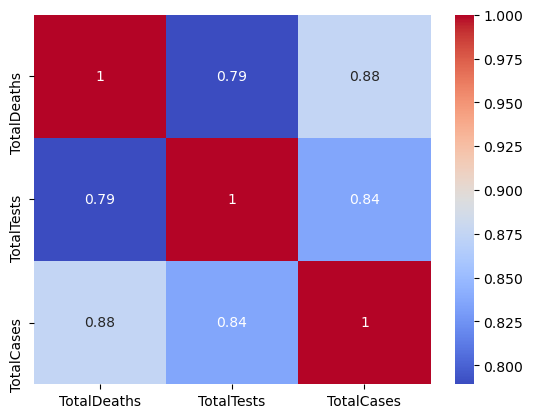

In [4]:
df = last_day[['TotalDeaths', 'TotalTests', 'TotalCases']]
corr_matrix = df.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

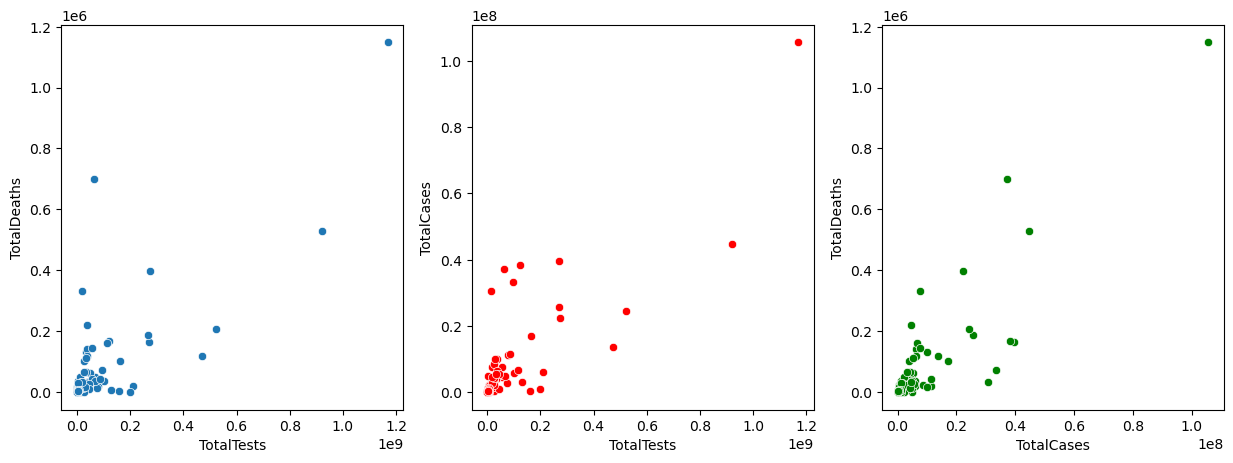

In [5]:
# Visualize the correlation between Total Tests and Total Deaths and Total Cases 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='TotalTests', y='TotalDeaths', data=last_day, ax=ax[0])
sns.scatterplot(x='TotalTests', y='TotalCases', data=last_day, ax=ax[1], color='red')
sns.scatterplot(x='TotalCases', y='TotalDeaths', data=last_day, ax=ax[2], color = 'green')
plt.show()

- Comments:
    - Correlation among mortality and testing rates and total cases is highly means that there is a relationship between mortality and testing rates as well as total cases.
    - That could influence the mortality rate is the testing rate. Countries with higher testing rates may detect more cases, including asymptomatic cases, which can lower the mortality rate. On the other hand, countries with lower testing rates may miss many cases, leading to a higher mortality rate.
    - Especially, the mortality rate of the countries with higher testing rates is lower than the countries with lower testing rates. That means if the case is detected by testing, the mortality rate is lower.
    - Moreover, if some one is tested positive can lead high risk of death due to the severity of the Covid 19 epidemic. 
    - Have outlier in the data. The number of deaths and the number of infections are significant high, with number of deaths nearly 120000 and number of cases above 100000000 cases until 03.10.2023.

In [6]:
outliers = last_day[last_day['TotalCases'] > 100000000]
outliers

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
1340,USA,2023-03-10,105599065,7451,1148765.0,50.0,103126259.0,42429,1324041.0,2365,1.168586e+09,334805269,North America,3


- And the outlier is the USA. 